In [2]:
import numpy as np

### <font color = blue> Computation on Arrays: Broadcasting </color>
&emsp;&emsp; <font color = blue> Broadcasting is simply a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes. </font>

In [3]:
a = np.arange(0, 3)
a

array([0, 1, 2])

In [4]:
a.shape

(3,)

In [5]:
b = np.full(3, 5)
b

array([5, 5, 5])

In [6]:
 b.shape

(3,)

In [7]:
a + b

array([5, 6, 7])

In [8]:
a + 5

array([5, 6, 7])

In [9]:
a + np.full(3, 5)

array([5, 6, 7])

In [10]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
 M.shape

(3, 3)

In [13]:
M + a 

# M shape: (3, 3)
# a shape: (3, ) -> (1, 3) -> (3, 3)

# array([0, 1, 2]) 
# array([[0, 1, 2]])

# array([[0, 1, 2],
#        [0, 1, 2],
#        [0, 1, 2]])

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [12]:
np.vstack([a, a, a])

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [14]:
a = np.arange(3)
a

array([0, 1, 2])

In [20]:
b = np.arange(3)[:, np.newaxis]  #(3, 1)
b

array([[0],
       [1],
       [2]])

In [21]:
print(a, "   ", a.shape)
print(b, "   ", b.shape)

[0 1 2]     (3,)
[[0]
 [1]
 [2]]     (3, 1)


In [22]:
np.vstack([ a, a, a])

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [23]:
np.hstack([b, b, b])

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

In [24]:
Out[22] + Out[23]

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [25]:
a + b
# a shape: (3,  ) -> (1, 3) -> (3, 3) -> (3, 3)
# b shape: (3, 1) -> (3, 1) -> (3, 1) -> (3, 3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<img src = "files/visualization_broadcasting.png">

#### <font color = blue> Rule of Broadcasting </color>
<font color = red size = 2> below if from <br>
    https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm
    <br> </font>
<font color = blue> **Broadcasting is possible if the following rules are satisfied**: 
    1. Array with smaller ndim than the other is prepended with '1' in its shape.
    2. Size in each dimension of the output shape is maximum of the input sizes in that dimension.
    3. An input can be used in calculation, if its size in a particular dimension matches the output size or its value is exactly 1. 
    4. If an input has a dimension size of 1, the first data entry in that dimension is used for all calculations along that dimension.

<font color = blue> **A set of arrays is said to be <mark> broadcastable </mark> if the above rules produce a valid results and one of the following is true**:
    1. Arrays have exactly the same shape.
    2. Arrays have the same number of dimensions and the length of each dimension is either a common length or 1.
    3. Array having too few dimensions can have its shape prepended with a dimension of lenght 1, so that the above stated property is true
 
<font color = red size = 2> Below if from the book <br> </font> 
    1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
    2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
    3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

<font color = blue> a

In [26]:
M = np.ones((2, 3)) # shape = (2, 3)
a = np.arange(3)    # shape = (3,  )

<font color = red>
M.shape = (2, 3)  -> (2, 3)  -> (2, 3) <br>
a.shape = (3,  )  -> (1, 3)  -> (2, 3)

In [27]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [28]:
a = np.arange(3).reshape((3, 1))  # shape = (3, 1)
b = np.arange(3)                  # shape = (3,  )

<font color = red>
a.shape = (3, 1)  -> (3, 1)  -> (3, 3) <br>
b.shape = (3,  )  -> (1, 3)  -> (3, 3)

In [29]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [30]:
M = np.ones((3, 2)) # shape = (3, 2)
a = np.arange(3)    # shape = (3, )

<font color = red>
M.shape = (3, 2)  -> (3, 2)  -> (3, 2) <br>
a.shape = (3,  )  -> (1, 3)  -> (3, 3) <br>
**Incompatible**, unless right padding is used.<br>
This is can be done by *np.newaxis* <br>
a.shape = (3,  ) -> (3, 1) [by np.newaxis] -> (3, 2)

In [31]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [32]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [33]:
np.logaddexp(M, a[:, np.newaxis]) # log(exp(a) + exp(b))

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

#### <font color = blue> Broadcasting in Practice </font>
> - <font color = blue> Centering an array

In [38]:
# An array of 10 observations, each of which consists of 3 values
X = np.random.random((10, 3))
X

array([[0.39788247, 0.91482407, 0.19409787],
       [0.07817158, 0.62612991, 0.97087176],
       [0.80297081, 0.09464417, 0.03809372],
       [0.79059535, 0.47331135, 0.88544235],
       [0.71182175, 0.25199985, 0.48999245],
       [0.00331289, 0.53386669, 0.33218207],
       [0.72553304, 0.43990239, 0.91194591],
       [0.67642459, 0.23653083, 0.4259214 ],
       [0.93226016, 0.76769161, 0.81342477],
       [0.27542453, 0.9282101 , 0.28468055]])

In [40]:
# Mean of each feature
Xmean = X.mean(axis = 0)
Xmean, Xmean.shape

(array([0.53943972, 0.5267111 , 0.53466529]), (3,))

In [42]:
# Centering the X array by subtracting the mean
X_centered = X - Xmean # X.shape = (10, 3)
                       # Xmean.shape = (3, )
                       # We are doing broadcasting here.
X_centered

array([[-0.14155725,  0.38811297, -0.34056742],
       [-0.46126814,  0.09941881,  0.43620648],
       [ 0.2635311 , -0.43206693, -0.49657156],
       [ 0.25115563, -0.05339974,  0.35077707],
       [ 0.17238203, -0.27471125, -0.04467284],
       [-0.53612683,  0.00715559, -0.20248321],
       [ 0.18609332, -0.0868087 ,  0.37728062],
       [ 0.13698487, -0.29018027, -0.10874389],
       [ 0.39282045,  0.24098051,  0.27875949],
       [-0.26401519,  0.401499  , -0.24998473]])

In [43]:
X_centered.mean(axis = 0)

array([-2.22044605e-17,  4.44089210e-17, -1.11022302e-17])

> - <font color = blue> Plotting a 2D function

In [44]:
x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)      # y * x

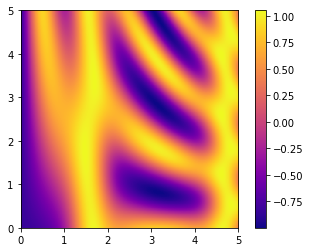

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin = 'lower', extent = [0, 5, 0, 5],
          cmap = 'plasma')
plt.colorbar()
plt.show()

### <font color = blue> Comparisons, Masks, and Boolean Logic </font>
    1. **Boolean masks**
    2. Extract, modify, count, or manipulate values in an array based on some criterion:
        2.1. Count all values greater than a certain values
        2.2. Remove all outliers that are above some threshold.

#### <font color = blue> Example: Counting Rainy Days </font>

In [1]:
import numpy as np
import pandas as pd

# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254. 
inches.shape

(365,)

In [9]:
pd.read_csv('Seattle2014.csv')['PRCP'].values

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

In [4]:
type(a)

pandas.core.frame.DataFrame

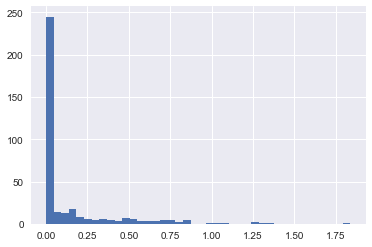

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

plt.hist(inches, 40);

<font color = blue>
> - Digging into the data
    1. How many rainy days were there in the year?
    2. What is the average precipitation on those rainy days?
    3. How many days were there with more than half an inch of rain?

### <font color = blue> Comparison Operators as ufuncs </font>
<img src = "files/element_comparison.png" width = 400>
<img src = "files/comparison_operators.png" width = 200>

In [11]:
np.equal?

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [14]:
amask = (x < 6)

In [21]:
np.sum(inches > 0)

150

### <font color = blue> Working with Boolean Arrays </font>

In [22]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


> - <font color = blue> Counting entries </font>
    1. *True* is "1", *False* is "0".
    2. np.count_nonzero
    3. np.sum(a, axis = None)
    4. np.any(a, axis=None, out=None, keepdims= ...)
    5. np.all(a, axis=None, out=None, keepdims= ...)

In [23]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [29]:
a = np.array(np.arange(-10, 10).reshape( (4,5)))
a

array([[-10,  -9,  -8,  -7,  -6],
       [ -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9]])

In [33]:
a < -4

array([[ True,  True,  True,  True,  True],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [36]:
a < 9

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False]])

In [35]:
np.count_nonzero(a < 9 )

19

In [26]:
np.arange?

In [37]:
b = (x < 6)
b

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [38]:
np.count_nonzero(b)

8

In [39]:
np.sum(x < 6) == np.count_nonzero(x < 6)

True

In [40]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [44]:
np.sum(x < 6, axis = 0)

array([2, 2, 2, 2])

In [41]:
# how many values less than 6 in each row
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [50]:
x1 = x.copy()
x1[0, 0] = -5
np.all(x == x1)

False

In [52]:
x1[0], x[0]

(array([-5,  0,  3,  3]), array([5, 0, 3, 3]))

In [67]:
np.any(x1 == x)

True

In [68]:
np.any?

In [54]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [59]:
x1

array([[-5,  0,  3,  3],
       [ 7,  9,  3,  5],
       [ 2,  4,  7,  6]])

In [55]:
# are there any values greater than 8?
np.any(x > 8)

True

In [58]:
# are there any values less than zero?
np.any(x1 < 0)

True

In [60]:
# are all values less than 10?
np.all(x < 10)

True

In [63]:
# are all values equal to 6?
np.all(x == 6)

False

In [64]:
# are all values in each row less than 8?
np.all(x < 8, axis = 1)

array([ True, False,  True])

> - <font color = blue> Boolean operators </font>
    1. Python’s bitwise logic operators, &, |, ^, and ~
    <img src = "files/boolean_operators.png" width = 150>

In [69]:
# rainfall between 0.5 and 1.0 inches
np.sum((inches > 0.5) & (inches < 1)) # parantheses are important

29

In [70]:
# rainfall between 0.5 and 1.0 inches
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

In [72]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number dyas with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number dyas with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


> - <font color = blue> Boolean Arrays as Masks </font>
    1. Use Boolean arrays as masks <mark> **to select particular subsets of the data.** </mark>

In [73]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [74]:
x< 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [75]:
x[x<5] #降维
# What is returned is a one-dimensional array 
# filled with all the values that meet this condition; 
# in other words, all the values in positions at which the mask array is True.

array([0, 3, 3, 3, 2, 4])

In [77]:
# construct a mask of all rainy days
rainy = (inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ",
np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ",
np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [79]:
inches[summer]

array([0.        , 0.        , 0.        , 0.        , 0.07086614,
       0.09055118, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01181102,
       0.75984252, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01968504, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01968504,
       0.5       , 0.8503937 , 0.        , 0.03937008, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33070866, 0.0511811 ,
       0.        , 0.11811024, 0.        , 0.        , 0.     

#### <font color = red size = 2> Using the Keywords *and / or* Versus the Operators *& / |* </font>
    1. *and/or*: the object is a single  Boolean entity. All nonzero integers as True.
    2. *& / |*: the expression operates on the bits of the element
    3. When you have an array of Boolean values in NumPy, this can be thought of  as a string of bits where 1 = True and 0 = False, and the result of & and | operates in a similar manner as before. Use *and / or* on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value.
    4. Similarly, when doing a Boolean expression on a given array, you should use *| or &* rather than *or* or *and*.
    5. For Boolean NumPy arrays, the *| or &* is nearly always the desired operation.

In [ ]:
bin?

In [ ]:
bool?

In [ ]:
bool(-3), bool(0), bool(42 and 0), bool(42 or 0), bool(42 | 0), bool(42 & 0)

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

In [ ]:
A & B

In [ ]:
A and B

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

In [ ]:
(x > 4) and (x < 8)

### <font color = blue> Fancy Indexing </font>
<font color = blue>&emsp; Like the simple indexing, but passing arrays of indices in place of single scalars. </font>

#### <font color = blue> Exploring Fancy Indexing </font>
    1. Passing an array of indices to access multiple array elements at once.
    2. The shape of the result reflects the shape of the index arrays rather than the shape of the array bing indexed.
    3. Also works in multiple dimensions: (a) The first index refers to row, and the second to the column; (b) Following all the broadcasting rules.


In [83]:
rand = np.random.RandomState(42)

x = rand.randint(100, size = 10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [81]:
np.array([x[3], x[7], x[2]])

array([71, 86, 14])

In [91]:
# Passing an array of indices to access multiple array elements at once.
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [92]:
# The shape of the result reflects the shape of the index arrays 
# rather than the shape of the array bing indexed.
ind = np.array([[3, 7],
               [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [94]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [95]:
# The first index refers to row, and the second to the column
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col] # X[0, 2], X[1, 1], X[2, 3]

array([ 2,  5, 11])

In [97]:
# Combien a column vector and a row vector
X[row[:, np.newaxis], col]
# With fancy indexing, the return values refelcted
# the braodcasted shape of the indcies, rather than
# the shape of the array being indexed.

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [96]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

#### <font color = blue> Combined Indexing </font>

In [99]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [98]:
# combine fancy and simple indices:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [100]:
# combine fancy indexing with slicing:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [101]:
# combine fancy indexing with masking:
mask = np.array([1, 0, 1, 0], dtype = bool)
mask

array([ True, False,  True, False])

In [102]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [103]:
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### <font color = blue> Example: Selecting Random Points </font>

In [107]:
# a 2D normal distribution
mean = [0, 0]
cov = [[1, 2],
      [2, 5]]
X = rand.multivariate_normal(mean, cov, 1000)
X.shape

(1000, 2)

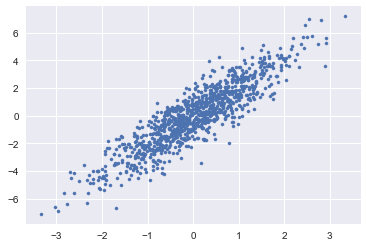

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(X[:, 0], X[:, 1], s = 10)
plt.show()

In [113]:
indices = np.random.choice(X.shape[0], 20, replace = False)
indices

array([593,   1, 257, 767,  24, 653, 810, 704, 700, 246, 558, 699,  52,
       908, 917, 854, 712, 642, 561,  62])

In [121]:
indices = X[:, 0] > 2
indices

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [122]:
selection = X[indices] # fancy indexing here
selection.shape

(26, 2)

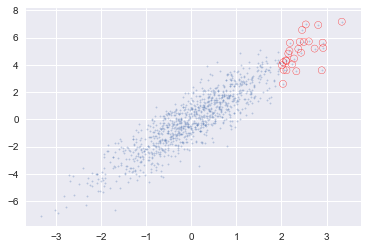

In [123]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, s = 2)
plt.scatter(selection[:, 0], selection[:, 1], edgecolors = 'red', 
            facecolor='none', s=50);
plt.show()

In [ ]:
rand.multivariate_normal?

In [ ]:
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[1, 0], [0, 100]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

#### <font color = blue> Modifying Values with Fancy Indexing </font>

In [16]:
x = np.arange(10)
i = np.random.randint(0, 10, 4)
i

array([9, 8, 0, 3])

In [10]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
x[i]

array([ 89,  89, -10,  89])

In [12]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
x[x>5] = 99
x

array([ 0,  1,  2,  3,  4,  5, 99, 99, 99, 99])

In [17]:
x[i] -= 10
x

array([-10,   1,   2,  -7,   4,   5,   6,   7,  -2,  -1])

<font color = red size =2> The repeated indices with these operations can cause some potentially unexpected results. </font>

In [36]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)
# first assign x[0] = 4, followed by x[0] = 6

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


> - <font color = red size = 2> It is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.
> - The at method: *np.ufunc.at(a, indices, b = None)*. Performs unbuffered in place operation on operand 'a' for elements specified by 'indices'. For addition ufunc, this method is equivalent to `a[indices] += b`, except that results are accumulated for elements that are indexed more than once. For example, `a[[0,0]] += 1` will only increment the first element once because of buffering, whereas
`add.at(a, [0,0], 1)` will increment the first element twice.
> - reduceat(), check this out during the lecture.

In [37]:
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
i = [2, 3, 3, 4, 4, 4]
x[i] = x[i] + 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [39]:
i = [2, 3, 3, 4, 4, 4]
np.add.at(x, [i], 1)
x

array([6., 0., 2., 3., 4., 0., 0., 0., 0., 0.])

In [34]:
x

array([ 6.,  0., 13., 24., 35.,  0.,  0.,  0.,  0.,  0.])

In [27]:
np.add.at?

In [40]:
np.add.reduceat?

In [ ]:
np.add.at?

### <font color = blue> Example: Binning Data </font>
<font color = blue>
> - check out several key functions during lecture
> - don't forget plt.hist (faster for big array)

In [41]:
# seed the random generation
np.random.seed(42)
# generate 1000000 random numbers and put the into a 1D array.
x = np.random.randn(1000000)
x

array([ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.11297975,
        1.46914237,  0.47643025])

In [81]:
# Compute a histogram by hand
# Generate bins
bins = np.linspace(-5, 5, 50)  # 500 bins from -5 to 5
# Generate the "count" array, where the initial values are all zeros
counts = np.zeros_like(bins)  # check this out during lecture

In [82]:
# find the appropriate bin for each x
i = np.searchsorted(bins, x) # check this out during lecture
i.shape

(1000000,)

In [83]:
# add 1 to each of these bins
np.add.at(counts, i, 1)

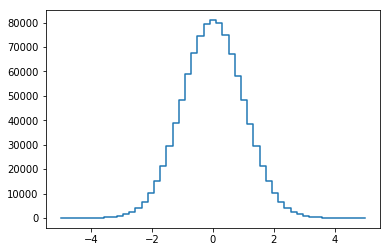

In [84]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(bins, counts, linestyle = 'steps')

In [68]:
bins2 = np.array([0, 1, 2, 3, 4])
# bin_index: 0, 1, 2, 3, 4
x2 = 2.4

np.searchsorted(bins2, x2, side = 'right')

3

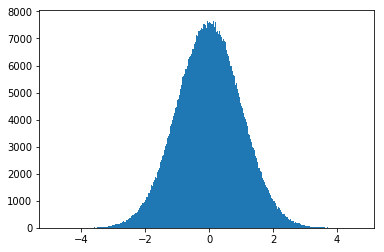

In [80]:
plt.hist(x, bins = 500);

In [44]:
np.searchsorted?

In [ ]:
bins

In [ ]:
np.zeros_like([[1, 2, 3]])

In [42]:
np.zeros_like?